In [12]:
import numpy as np
from sklearn import model_selection, preprocessing

In [13]:
X  = np.random.randint(-50000, 50000, (20000,1))

In [14]:
Y = (X - 3000.00)**2

In [15]:
import matplotlib.pyplot as plt

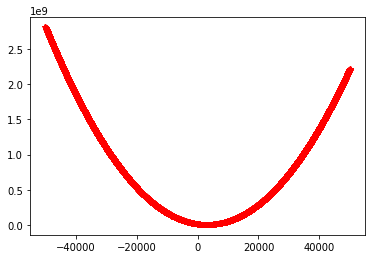

In [16]:
fig, aux = plt.subplots()
aux.plot(X, Y, 'r*')
plt.show()

In [17]:
# construct the feature and target vectors
# Y = X^2 + 9000000 - 6000*X

X = np.hstack([X**2, X])


In [18]:
#preprocessing
X = preprocessing.scale(X.astype(np.float))

/Users/spodeti/Documents/environments/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [19]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.3)

In [20]:
def cost_function(X, Y, theta):
    return (1/(2*X.shape[0]))* np.sum(np.square((np.dot(X, theta)-Y)), axis=0)[0]

In [52]:
def stochastic_gradient_descent(X, Y, learning_rate=.000001, error=1e-9):
    (m,n) = X.shape
    X = np.hstack([np.ones((m,1)), X])
    
    theta = np.zeros((n+1,1))
    
    no_of_iter = 0
    
    np.random.shuffle(X)
    
    while True:
        
        cost_prev = cost_function(X, Y, theta)
        # update theta
        theta -= learning_rate*np.dot(X.T[:, :n+1], (np.dot(X.T, theta) - Y)[:n+1, :])
        cost_curr = cost_function(X, Y, theta)
        #print(abs(cost_curr - cost_prev))
        if abs(cost_curr - cost_prev) < error:
            break
        no_of_iter += 1
        
    return (no_of_iter, theta)

In [53]:
(no_of_iter, theta) = stochastic_gradient_descent(X_train, Y_train)

ValueError: shapes (3,14000) and (3,1) not aligned: 14000 (dim 1) != 3 (dim 0)

In [47]:
no_of_iter, theta

(1173, array([[ 8.28076330e+08],
        [-8.91064391e+05],
        [ 8.35998924e+06]]))

In [25]:
def batch_gradient_descent(X, Y, learning_rate=0.01, error=1e-9):
    (m,n) = X.shape
    X = np.hstack([np.ones((m,1)), X])
    
    theta = np.zeros((n+1,1))
    
    no_of_iter = 0
    
    while True:
        cost_prev = cost_function(X, Y, theta)
        theta -= (learning_rate/m)*np.dot(X.T, np.dot(X, theta)-Y)
        cost_curr = cost_function(X, Y, theta)
        if abs(cost_prev-cost_curr)<error:
            break
            
        no_of_iter += 1
        
    return (no_of_iter, theta)
        

In [30]:
(no_of_iter, theta) = batch_gradient_descent(X_train, Y_train)

In [31]:
theta

array([[ 8.28663244e+08],
       [ 7.39933405e+08],
       [-1.71947136e+08]])

In [32]:
no_of_iter

2904

In [34]:
from sklearn import linear_model

In [35]:
lgr = linear_model.LinearRegression()

In [36]:
lgr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lgr.intercept_

array([8.28663244e+08])

In [38]:
lgr.coef_

array([[ 7.39933405e+08, -1.71947136e+08]])